# MPC Final TP : Predicting house prices

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
houses = pd.read_csv("houses.csv", index_col=0)
new_houses = pd.read_csv('houses_competition.csv', index_col=0)

In [3]:
houses

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6681,3.500,3,2.25,1860,8378,2.0,0.0,0.0,3,7,1860,0,1995,0.0,98038,47.3875,-122.032,1870,8378
17798,5.925,4,3.00,2170,8240,1.0,0.0,0.0,4,8,1370,800,1968,0.0,98052,47.6291,-122.093,2020,7944
18854,2.555,2,1.00,1440,43560,1.0,0.0,0.0,4,7,1150,290,1965,0.0,98027,47.4916,-122.082,1870,56628
13478,13.300,4,2.25,3260,4640,2.0,0.0,0.0,5,9,2360,900,1907,0.0,98112,47.6272,-122.312,3240,5800
10509,3.891,2,1.00,840,5400,1.0,0.0,0.0,4,7,840,0,1948,0.0,98118,47.5489,-122.271,1340,5400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16125,2.900,2,1.00,930,7740,1.0,0.0,0.0,3,6,930,0,1924,0.0,98125,47.7091,-122.292,1250,7740
19004,3.150,3,2.50,1730,6368,2.0,0.0,0.0,3,7,1730,0,1993,0.0,98038,47.3505,-122.032,1780,6597
9094,6.850,3,2.50,3450,8000,3.0,0.0,0.0,4,8,2970,480,1927,1975.0,98116,47.5605,-122.402,1880,6135
3537,3.260,6,1.50,1930,8400,1.0,0.0,0.0,3,7,1030,900,1971,0.0,98146,47.4869,-122.340,1780,9520


In [4]:
new_houses

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15529,3,2.25,2140,9775,1.0,0.0,0.0,4,7,1470,670,1978,0.0,98023,47.3060,-122.379,2050,8625
3233,2,2.25,1240,1172,2.0,0.0,0.0,3,8,1000,240,2008,0.0,98144,47.5877,-122.316,1260,1111
14381,2,2.00,1730,4248,2.0,0.0,0.0,3,7,1730,0,1905,0.0,98144,47.5933,-122.308,1380,4000
3201,4,4.25,4883,26040,2.0,0.0,3.0,3,10,3859,1024,2006,0.0,98092,47.2630,-122.216,3736,9870
3425,4,2.50,1910,5000,2.0,0.0,0.0,3,7,1910,0,2005,0.0,98038,47.3608,-122.036,2020,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,3,2.00,2330,6346,1.5,0.0,0.0,3,6,1600,730,1934,2014.0,98146,47.5135,-122.380,1380,8400
9973,3,2.50,1870,3118,2.0,0.0,0.0,3,8,1870,0,1993,0.0,98038,47.3739,-122.056,1580,3601
9007,3,2.00,1540,6000,1.0,0.0,0.0,4,6,1540,0,1953,0.0,98155,47.7372,-122.307,1490,8213
16345,4,3.50,4010,10880,2.0,0.0,3.0,4,11,3150,860,1990,0.0,98040,47.5359,-122.213,3530,17310


In [5]:
#just checking if there is any missing values
print(houses.isnull().values.any())
print(new_houses.isnull().values.any())

False
False


## 1. Statistical study

In [6]:
target_var = houses['price']

In [7]:
predictive_vars = houses.loc[:, houses.columns != 'price']

mean 5.411904851086057
median 4.5
max 77.0
min 0.82
standard deviation 3.727861547709787


<AxesSubplot:ylabel='Frequency'>

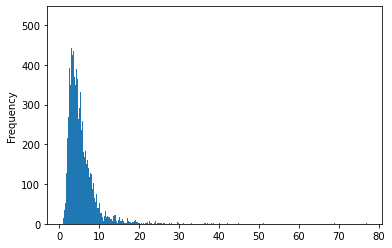

In [8]:
#some stats about our target variable
print("mean", target_var.mean())
print("median", target_var.median())

print("max", target_var.max())
print("min", target_var.min())

print("standard deviation", target_var.std())

target_var.plot.hist(bins=500)

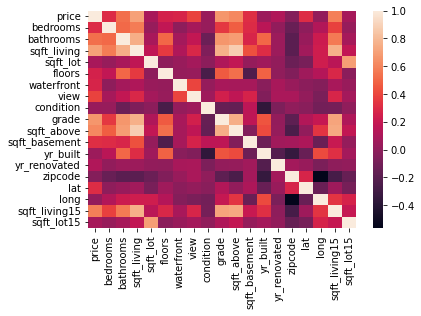

In [9]:
#correlation between variables
import seaborn as sn

sn.heatmap(houses.corr())
plt.show()

In [10]:
houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,13397.000000,13397.000000,13397.000000,13397.000000,1.339700e+04,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000
mean,5.411905,3.379861,2.122509,2085.261775,1.525303e+04,1.495185,0.006867,0.225648,3.412406,7.662312,1792.022542,293.030604,1971.132642,83.006494,98077.574756,47.559242,-122.213414,1987.884750,12774.004180
std,3.727862,0.938934,0.764619,919.172404,3.973164e+04,0.539493,0.082587,0.752068,0.652101,1.168484,827.231993,443.115894,29.360525,398.562717,53.391212,0.138897,0.140730,680.418605,25855.329281
min,0.820000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.220000,3.000000,1.750000,1430.000000,5.050000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,47.469300,-122.328000,1490.000000,5100.000000
50%,4.500000,3.000000,2.250000,1920.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1564.000000,0.000000,1975.000000,0.000000,98065.000000,47.571500,-122.229000,1840.000000,7620.000000
75%,6.440000,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.677500,-122.123000,2360.000000,10091.000000
max,77.000000,33.000000,8.000000,13540.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,434728.000000


## 2. Simple regression

In order to choose what will be the best variable between the 18 variables for our simple regression, we can use:
 - The coefficient of determination R^2 (highter better)
 - The quantity of information not explained by the model I_r (lower better)
 - The critical probability of the student's test on the predictive variable (lower better)

In [11]:
import statsmodels.api as sm

best_model = None
Y = target_var
models = {}
for v in predictive_vars:
    X = predictive_vars[v]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    models[v] = {'R^2' : model.rsquared, 'I_r' : sum(model.resid), 'P>|t|' : model.pvalues[1],  'model' : model}

In [12]:
pd.DataFrame(models)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
R^2,0.091853,0.276902,0.496401,0.007529,0.06673,0.073595,0.150699,0.001081,0.436505,0.374716,0.098391,0.001823,0.014062,0.001862,0.095315,0.000231,0.336037,0.005971
I_r,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0
P>|t|,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000141,0.0,0.0,0.0,0.000001,0.0,0.000001,0.0,0.078812,0.0,0.0
model,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...,<statsmodels.regression.linear_model.Regressio...


- for R^2 : grade
- for I_r : sqft_living
- for P>|t| : all params execpt condition, yr_build and long

R^2 could be misleading and P>|t| does not give us much information in this case so (with I_r), we would tend to choose sqft_living as the parameter for this regression. **However we are not convinced and since in our case it is not too greedy, we will compare the generalization error of all possible one-variable models and then take the model with the smallest error.**

First, let's split our dataset in a train dataset and a test dataset, here we choosed (80 - 20)

In [13]:
from sklearn.model_selection import train_test_split

houses_train , houses_test = train_test_split(houses, test_size=0.2) 

In [14]:
print(len(houses_train.index) + len(houses_test.index) == len(houses.index))
print(set(houses_train.index).isdisjoint(set(houses_test.index))) 

True
True


In [15]:
#function which returns the simple regression model
def simple_regression_model(data, X_name, Y_name):
    X = data[X_name]
    X = sm.add_constant(X)
    Y = data[Y_name]
    return sm.OLS(Y, X).fit()

In [16]:
#function which returns the predictions of a model 
def prediction(model, data_test):
    explanatory_vars = model.model.exog_names[1:]
    X_new = data_test.loc[:,explanatory_vars] 
    X_new = sm.add_constant(X_new) 
    return model.predict(X_new)

In [17]:
#function which returns the generalization error of predictions of a model
def generalization_error(model, predictions, data_test):
    real_data = data_test[model.model.endog_names]
    return np.mean((predictions - real_data) ** 2)
    

In [18]:
#function which plot on the same graph the price of real values and predictes values
def plot_both(data, predictions, expl_var):
    
    plt.plot(data[expl_var], data['price'], 'ro')
    plt.plot(data[expl_var], predictions, color="green")

    plt.title(f"price in function of {expl_var}")
    plt.xlabel(f"{expl_var}")
    plt.ylabel('price')
    plt.show()

Let's test the regression with thz sqft_living parameter

In [19]:
m = simple_regression_model(houses_train, 'sqft_living', 'price')
p = prediction(m, houses_test)
generalization_error(m, p, houses_test)

6.239471979421234

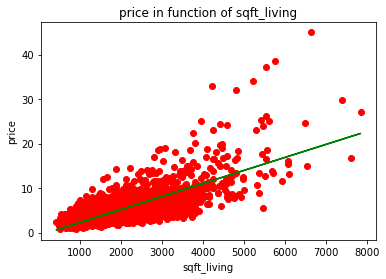

In [20]:
plot_both(houses_test, p, 'sqft_living')

We test also with an other parameter

In [21]:
m = simple_regression_model(houses_train, 'grade', 'price')
p = prediction(m, houses_test)
generalization_error(m, p, houses_test)

6.722509596131509

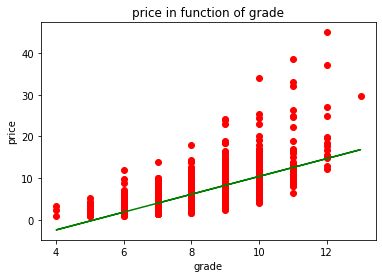

In [22]:
plot_both(houses_test, p, 'grade')

Now, let's calculate the error of generalization for all the simple regression models and see which one has the lowest error: we will finally choose this model

In [23]:
g_errors_simple_reg = {}
for v in predictive_vars:
    tmp_model = simple_regression_model(houses_train, v, 'price')
    tmp_preds = prediction(tmp_model, houses_test)
    tmp_err = generalization_error(tmp_model, tmp_preds, houses_test)
    g_errors_simple_reg[v] = tmp_err

In [24]:
pd.Series(g_errors_simple_reg).to_frame()

,0
bedrooms,10.609104
bathrooms,8.736269
sqft_living,6.239472
sqft_lot,11.656676
floors,10.981335
waterfront,10.802753
view,10.027949
condition,11.753484
grade,6.722510
sqft_above,7.553455


**We see that the model taking 'sqft_living' as predictive parameter has the lowest generalization error, so we finally choose this model for this part on simple linear regression.**

## 3. Multiple regression 

In this part we will use all the 18 predictive variables to make a multiple regression model 

In [25]:
#function which returns the general multiple regression model (extension of the simple regression function)
def multiple_regression_model(data, X_names, Y_name):
    
    X = data.loc[:, X_names]
    X = sm.add_constant(X)
    Y = data[Y_name]
    
    return sm.OLS(Y, X).fit()

In [26]:
mod = multiple_regression_model(houses, np.array(predictive_vars.columns), 'price')
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1720.
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        21:35:46   Log-Likelihood:                -28610.
No. Observations:               13397   AIC:                         5.726e+04
Df Residuals:                   13378   BIC:                         5.740e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            43.5039     38.022      1.144      0.253     -31.025     118.033
bedrooms         -0.3681      0.024    -15.259      0.000      -0.415      -0.321
bathrooms         0.4609      0.042     10.895      0.000       0.378       0.544
sqft_living       0.0016      0.000      7.500      0.000       0.001       0.002
sqft_lot       4.757e-07   6.21e-07      0.766      0.444   -7.42e-07    1.69e-06
floors            0.0472      0.046      1.016      0.309      -0.044       0.138
waterfront        6.4321      0.234     27.434      0.000       5.973       6.892
view              0.5156      0.028     18.458      0.000       0.461       0.570
condition         0.2531      0.030      8.312      0.000       0.193       0.313
grade             0.9263      0.028     33.140      0.000       0.872       0.981
sqft_above        0.0004      0.000      1.719      0.086   -5.05e-05       0.001
sqft_basement -4.283e-05      0.000     -0.208      0.835      -0.000       0.000
yr_built         -0.0274      0.001    -29.225      0.000      -0.029      -0.026
yr_renovated      0.0002   4.74e-05      3.766      0.000    8.57e-05       0.000
zipcode          -0.0056      0.000    -13.185      0.000      -0.006      -0.005
lat               6.0332      0.139     43.545      0.000       5.762       6.305
long             -2.2090      0.170    -12.966      0.000      -2.543      -1.875
sqft_living15     0.0002   4.51e-05      3.743      0.000    8.04e-05       0.000
sqft_lot15    -2.815e-06   9.64e-07     -2.921      0.003    -4.7e-06   -9.26e-07
==============================================================================
Omnibus:                    11937.369   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1420977.101
Skew:                           3.795   Prob(JB):                         0.00
Kurtosis:                      52.880   Cond. No.                     2.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**We see that the model has well taken into account our 18 explanatory variables.**
Let's calculate the generalization error and compare it to our previously chosen model

In [27]:
all_18_model = multiple_regression_model(houses_train, np.array(predictive_vars.columns), 'price')
all_18_model_preds = prediction(all_18_model, houses_test)
g_error_all_18 = generalization_error(all_18_model, all_18_model_preds, houses_test)

In [28]:
print(g_error_all_18)
print(g_errors_simple_reg['sqft_living'])

3.502965352276679
6.239471979421234


We see that the model with all the variables is much better. However, to have an even more efficient generalization error of these models and to be 100% sure of the conclusion, let's use the K-fold cross validation.

In [29]:
from sklearn.model_selection import KFold


k_fold = KFold(n_splits=5) #n_splits=5 correspond to 80 - 20 train - test
splits = k_fold.split(houses)

In [30]:
trains = []
tests = []
for train, test in splits:
    print(train, test)
    trains.append(train)
    tests.append(test)

[ 2680  2681  2682 ... 13394 13395 13396] [   0    1    2 ... 2677 2678 2679]
[    0     1     2 ... 13394 13395 13396] [2680 2681 2682 ... 5357 5358 5359]
[    0     1     2 ... 13394 13395 13396] [5360 5361 5362 ... 8036 8037 8038]
[    0     1     2 ... 13394 13395 13396] [ 8039  8040  8041 ... 10715 10716 10717]
[    0     1     2 ... 10715 10716 10717] [10718 10719 10720 ... 13394 13395 13396]


In [31]:
#returns the estimation of the generalization error which is the average of the K measure errors
def g_error_cross_validation(kf, pred_vars, train_arr, test_arr):
    g_errors = []
    
    for i in range(kf.get_n_splits()):
        m = multiple_regression_model(houses.iloc[train_arr[i]], pred_vars, 'price')
        p = prediction(m, houses.iloc[test_arr[i]])
        g_errors.append(generalization_error(m, p, houses.iloc[test_arr[i]]))
      
    return np.mean(g_errors)

In [32]:
print("just sqft_living variable => ", g_error_cross_validation(k_fold, 'sqft_living', trains, tests))
print("all 18 variables => ", g_error_cross_validation(k_fold, np.array(predictive_vars.columns), trains, tests))

just sqft_living variable =>  7.016904845052646
all 18 variables =>  4.253171986312557


In [33]:
#Generate csv file
p = prediction(all_18_model, new_houses)
p = pd.DataFrame({'ID':new_houses.index, 'Price':p})
p.to_csv("all_vars.csv", index=False)

**We see that the model that takes into account the 18 variables remains our best model for the moment.**

## 4. Variable selection 

We are now going to test models that take as predictive variables a subset of the 18 variables. Doing an exhaustive search for the models of all these subsets is too greedy (we never do it when there are more than 15 variables) because it would give us 2^18 = 262 144 models to generate. To avoid this we will find models with different selection algorithms (**forward search and backward search**) parameterized with different performance criteria (generalization error, R adjusted, critical probability of the Student Test) as well as different stopping criteria.

In [34]:
import math

#perf_criterion='r' -> r squared adjusted
#perf_criterion='p' -> critical probability of student test
#forward_search=True -> forward_search
#forward_search=True -> backward_search
def step_selection_r_or_p(train, selected_vars, remain_vars, perf_criterion, forward_search):
    
    best_var = None
    
    if perf_criterion == 'r':
        best_perf = -math.inf
        
    elif perf_criterion == 'p':
        best_perf = math.inf
        
    #no need to check the else because this function is call in parent calling function where it's already check
        
    
    for v in remain_vars:
        
        if forward_search:
            m = multiple_regression_model(train, selected_vars+[v], 'price')
            
        else:     
            copy =selected_vars.copy()
            copy.remove(v)
            m = multiple_regression_model(train, copy, 'price')
            
        
        if perf_criterion == 'r':
            
            if m.rsquared_adj > best_perf:
                best_perf = m.rsquared_adj
                best_var = v 
                
        if perf_criterion == 'p':
            #not sure about that
            if m.pvalues[0] < best_perf:
                best_perf = m.pvalues[0]
                best_var = v 
       
    return best_var, best_perf

In [35]:
#step selection with the generalization error as criteria
#forward_search=True -> forward_search
#forward_search=True -> backward_search
def step_selection_g(train, selected_vars, remain_vars, forward_search):
    
    min_g_error = math.inf
    best_var = None
    
    local_trains = []
    local_tests = []
    
    splits = k_fold.split(train)
    for local_train, local_test in splits:
        local_trains.append(local_train)
        local_tests.append(local_test)
    
    for v in remain_vars:
        
        if forward_search:
            g = g_error_cross_validation(k_fold, selected_vars+[v], local_trains, local_tests)
            
        else:
            copy =selected_vars.copy()
            copy.remove(v)
            g = g_error_cross_validation(k_fold, copy, local_trains, local_tests)
        
        if g < min_g_error:
            min_g_error = g
            best_var = v
            
    return best_var, min_g_error

In [36]:
#function who return the best subset of predictive variables according to perf_criterion and stopping_criterion_nb
# forward selection of forward_search=True, backward selection otherwise
def selection(train, variables, perf_criterion, stopping_criterion_nb, forward_search):
    
    if stopping_criterion_nb < 1 or stopping_criterion_nb > len(variables):
        raise ValueError(f"stopping_criterion_nb should be between O and {len(variables)}")
     
    if perf_criterion == 'g' or perf_criterion == 'p':
        best_perf = math.inf
    
    elif perf_criterion == 'r':
        best_perf = -math.inf
            
    else:
        raise ValueError("Wrong argument passed as perf_criterion.")
    
    if forward_search:
        remain_vars = variables.copy()
        selected_vars = []
        best_subset = []
        
    else:
        remain_vars = variables.copy()
        selected_vars = variables.copy()
        best_subset = variables.copy()
        
        
    while stopping_criterion_nb > 0 and len(remain_vars) > 0:
        
        if perf_criterion == 'g':
            selected_var, perf = step_selection_g(train, selected_vars, remain_vars, forward_search)
        
        elif perf_criterion == 'r':
            selected_var, perf = step_selection_r_or_p(train, selected_vars, remain_vars, 'r', forward_search)
        
        elif perf_criterion == 'p':
            selected_var, perf = step_selection_r_or_p(train, selected_vars, remain_vars, 'p', forward_search)
        
        if forward_search:
            selected_vars.append(selected_var)
            remain_vars.remove(selected_var)
            
        else:
            selected_vars.remove(selected_var)
            remain_vars.remove(selected_var)
        

        if perf_criterion == 'r':
            if perf >= best_perf:
                best_perf = perf
                best_subset = selected_vars.copy()
                
            else:
                stopping_criterion_nb -= 1
                
        else:
            if perf <= best_perf:
                best_perf = perf
                best_subset = selected_vars.copy()
                
            else:
                stopping_criterion_nb -= 1
     
    return best_subset

**Let's now test the forward and backward search algorithms with different settings (i.e. combinations of different performance and stop criteria) and compare the generalization errors of the chosen subsets.**

In [37]:
forward_search_results = {'g': {}, 'r' : {}, 'p' : {}}
backward_search_results = {'g': {}, 'r' : {}, 'p' : {}}

for perf_crit in ['g', 'r', 'p']:
    
    for stop_crit in ['1', '4', '18']:# 1 -> very strictn, 4 -> less strict, 18 -> not strict at all
              
        sub = selection(houses_train, list(predictive_vars.columns), perf_crit, int(stop_crit), True)
        m = multiple_regression_model(houses_train, sub, 'price')
        p = prediction(m, houses_test)
        g = generalization_error(m, p, houses_test)
        forward_search_results[perf_crit][stop_crit] = [g, sub]
        
        sub2 = selection(houses_train, list(predictive_vars.columns), perf_crit, int(stop_crit), False)
        m2 = multiple_regression_model(houses_train, sub2, 'price')
        p2 = prediction(m2, houses_test)
        g2 = generalization_error(m2, p2, houses_test)
        backward_search_results[perf_crit][stop_crit] = [g2, sub2]

In [38]:
pd.DataFrame(forward_search_results)

,g,r,p
1,"[3.502964803006226, [sqft_living, lat, waterfr...","[3.5037789098337004, [sqft_living, lat, waterf...","[3.8785213898934554, [sqft_lot, waterfront, vi..."
4,"[3.502964803006226, [sqft_living, lat, waterfr...","[3.5037789098337004, [sqft_living, lat, waterf...","[3.8785213898934554, [sqft_lot, waterfront, vi..."
18,"[3.502964803006226, [sqft_living, lat, waterfr...","[3.5037789098337004, [sqft_living, lat, waterf...","[3.8785213898934554, [sqft_lot, waterfront, vi..."


In [39]:
pd.DataFrame(backward_search_results)

,g,r,p
1,"[3.5029648030086245, [bedrooms, bathrooms, sqf...","[3.5037789098330605, [bedrooms, bathrooms, sqf...","[6.3410672213989745, [sqft_above, lat]]"
4,"[3.5029648030086245, [bedrooms, bathrooms, sqf...","[3.5037789098330605, [bedrooms, bathrooms, sqf...","[11.777207863099253, []]"
18,"[3.5029648030086245, [bedrooms, bathrooms, sqf...","[3.5037789098330605, [bedrooms, bathrooms, sqf...","[11.777207863099253, []]"


In [40]:
print(forward_search_results['g']['1'][1])

['sqft_living', 'lat', 'waterfront', 'grade', 'yr_built', 'view', 'bedrooms', 'bathrooms', 'zipcode', 'long', 'sqft_basement', 'condition', 'sqft_living15', 'sqft_lot15', 'yr_renovated']


In [41]:
print(backward_search_results['g']['1'][1])

['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [42]:
print(set(backward_search_results['g']['1'][1]) == set(forward_search_results['g']['1'][1]))

True


In [43]:
print(forward_search_results['r']['1'][1])

['sqft_living', 'lat', 'waterfront', 'grade', 'yr_built', 'view', 'bedrooms', 'bathrooms', 'zipcode', 'long', 'sqft_above', 'condition', 'yr_renovated', 'sqft_lot15', 'sqft_living15', 'sqft_lot']


In [44]:
print(backward_search_results['r']['1'][1])

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [45]:
print(set(backward_search_results['r']['1'][1]) == set(forward_search_results['r']['1'][1]))

True


In [46]:
print(set(forward_search_results['g']['1'][1]) == set(forward_search_results['r']['1'][1]))

False


**We can see that in our case the stop criterion does not have much influence. We can also see that the performance criterion of generalization and adjusted R-squared are much better than the critical probability criterion of the Student Test.
Since the performance criteria of generalization and adjusted R-squared are extremely close, we will select the subsets given by both.**

In [47]:
#Generate csv files
m = multiple_regression_model(houses_train, forward_search_results['g']['1'][1], 'price')
p = prediction(m, new_houses)
p = pd.DataFrame({'ID':new_houses.index, 'Price':p})
p.to_csv("select_g_err.csv", index=False)

m = multiple_regression_model(houses_train, forward_search_results['r']['1'][1], 'price')
p = prediction(m, new_houses)
p = pd.DataFrame({'ID':new_houses.index, 'Price':p})
p.to_csv("select_r_adj.csv", index=False)

## 5. Non-linear models 

### a) Polynomial regression

In this part we will try to find a model that will make better predictions than the ones we have done before by using **polynomial regression**. Several questions arise: which subset of variables to use? For which of these variables should we use powers? What to put as power?

We will obviously not test all the possibilities because there are too many and it is not worth it. For the subsets, we will choose among those suggested by our algorithms in the previous part. We will then try to put powers on the variables likely to be the most influential by testing different combinations of variables and powers.

Let's do some tests first before starting on models with more complexity

In [48]:
#function who you can add some polynomial features to a given dataset.
def add_polynomial_feature(data, pred_vars, power):
    new_data = data.copy(deep = True)
    added = []
    for var in pred_vars:
        for j in power:
            for k in range(2, j+1):
                name = f"{var}_pow_{k}"
                added.append(name)
                new_data[name] = new_data.loc[:,var]**k
    return new_data, added

Let's first compare the simple linear model that we needed at the very beginning with this same model but with its predictive variable at different powers.

In [49]:
m = multiple_regression_model(houses_train, 'sqft_living', 'price')
p = prediction(m, houses_test)
g = generalization_error(m, p, houses_test)
print(g)

6.239471979421234


In [50]:
for i in range(2, 10):
    train_poly, news = add_polynomial_feature(houses_train, ['sqft_living'], [i])
    test_poly, news = add_polynomial_feature(houses_test, ['sqft_living'], [i])
    m = multiple_regression_model(train_poly, ['sqft_living']+news, 'price')
    p = prediction(m, test_poly)
    g = generalization_error(m, p, test_poly)
    print(f"g err : {g}   degree : {i}")

g err : 5.679006308227321   degree : 2
g err : 5.689947322431365   degree : 3
g err : 5.793807973382994   degree : 4
g err : 7.160672746383082   degree : 5
g err : 7.1267698686376155   degree : 6
g err : 7.118902817276839   degree : 7
g err : 7.114254962003411   degree : 8
g err : 7.114480515993411   degree : 9


We see that in this case the degree that gives the best result is the degree 2. Note that we still have better results than our non-polynomial model up to degree 4.

We are now going to compare the generalization error with different subset of predictive variables with different subset of these subset which can have higher degrees (a bit complicated sentence)

In [51]:
#test_feature_vars -> a subset of pred_vars
#This function will loop over the test_feature_vars list to find the best sub list to raise to the power and at what power
def best_poly_features(pred_vars, test_feature_vars):
    
    tmp = []
    min_g = np.inf
    best_degree = None
    bests = []
    
    for element in test_feature_vars:
        
        tmp.append(element)

        for i in range(1, 10):
    
            train_poly, news = add_polynomial_feature(houses_train, tmp, [i])
            test_poly, news = add_polynomial_feature(houses_test, tmp, [i])
            
            m = multiple_regression_model(train_poly, pred_vars+news, 'price')
            p = prediction(m, test_poly)
            g = generalization_error(m, p, test_poly)
            bests.append([g, i, tmp.copy()])
    bests.sort()
    return bests    

In [52]:
all_vars = list(predictive_vars.columns)
sub_forward_g = forward_search_results['g']['1'][1] #we saw that same sub is generated by backward_g
sub_forward_r = forward_search_results['r']['1'][1] #we saw that same sub is generated by backward_r

In [53]:
bests_poly_all_all = best_poly_features(all_vars, all_vars)
print("error", bests_poly_all_all[0][0])
print("degree", bests_poly_all_all[0][1])

error 2.871035432700186
degree 2


In [54]:
bests_poly_all_g = best_poly_features(all_vars, sub_forward_g)
print("error", bests_poly_all_g[0][0])
print("degree", bests_poly_all_g[0][1])

error 2.8647456839019347
degree 3


In [55]:
bests_poly_all_r = best_poly_features(all_vars, sub_forward_r)
print("error", bests_poly_all_r[0][0])
print("degree", bests_poly_all_r[0][1])

error 2.8647456839019347
degree 3


In [56]:
bests_poly_g_g = best_poly_features(sub_forward_g, sub_forward_g)
print("error", bests_poly_g_g[0][0])
print("degree", bests_poly_g_g[0][1])

error 2.8579290905206087
degree 3


In [57]:
bests_poly_r_r = best_poly_features(sub_forward_r, sub_forward_r)
print("error", bests_poly_r_r[0][0])
print("degree", bests_poly_r_r[0][1])

error 2.85735615140145
degree 3


In [58]:
#generate csv files
train_poly, news = add_polynomial_feature(houses, bests_poly_r_r[0][2], [bests_poly_r_r[0][1]])
test_poly, news = add_polynomial_feature(new_houses, bests_poly_r_r[0][2], [bests_poly_r_r[0][1]])
            
m = multiple_regression_model(train_poly, sub_forward_r+news, 'price')
p = prediction(m, test_poly)
p = pd.DataFrame({'ID':new_houses.index, 'Price':p})
p.to_csv("poly_r_adj.csv", index=False)


train_poly, news = add_polynomial_feature(houses, bests_poly_g_g[0][2], [bests_poly_r_r[0][1]])
test_poly, news = add_polynomial_feature(new_houses, bests_poly_g_g[0][2], [bests_poly_r_r[0][1]])
            
m = multiple_regression_model(train_poly, sub_forward_g+news, 'price')
p = prediction(m, test_poly)
p = pd.DataFrame({'ID':new_houses.index, 'Price':p})
p.to_csv("poly_g_err.csv", index=False)

### b) Neural network

We will now try to make even more accurate predictions using a neural network

In [59]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
X_train = houses_train.drop('price',axis =1).values
X_test = houses_test.drop('price',axis =1).values

y_train = houses_train['price'].values
y_test = houses_test['price'].values

In [61]:
#feature scaling to improve the performance of our model
s = StandardScaler()
X_train = s.fit_transform(X_train.astype(np.float))
X_test = s.transform(X_test.astype(np.float))

In [62]:
model = Sequential()

#first layer -> input
model.add(Dense(19,activation='relu')) 

#hidden layers (number of layers and neurons chosen empirically according to the performance of the network)
model.add(Dense(19,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='relu'))

#last layer -> One result (the price) so one output neuron
model.add(Dense(1)) 


model.compile(optimizer='adam',loss='mse')

In [63]:
# here we ask to stop the fitting when the validation loss did not improve since 50 epochs
# the parameter restore_best_weights is to ask to return the best model found and not the one after the last epoch 
my_callbacks= EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

In [64]:
# batch_size and epochs parameters chosen empirically
hist = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=500, callbacks=my_callbacks)

Epoch 1/500
84/84 [==============================] - 2s 8ms/step - loss: 44.5005 - val_loss: 38.8840
Epoch 2/500
84/84 [==============================] - 0s 4ms/step - loss: 42.3873 - val_loss: 36.6841
Epoch 3/500
84/84 [==============================] - 0s 5ms/step - loss: 31.4579 - val_loss: 7.0214
Epoch 4/500
84/84 [==============================] - 0s 4ms/step - loss: 6.0590 - val_loss: 3.8836
Epoch 5/500
84/84 [==============================] - 0s 4ms/step - loss: 4.5336 - val_loss: 3.3667
Epoch 6/500
84/84 [==============================] - 0s 4ms/step - loss: 4.1450 - val_loss: 3.1726
Epoch 7/500
84/84 [==============================] - 0s 4ms/step - loss: 3.9166 - val_loss: 3.0357
Epoch 8/500
84/84 [==============================] - 0s 4ms/step - loss: 3.7874 - val_loss: 3.1157
Epoch 9/500
84/84 [==============================] - 0s 4ms/step - loss: 3.6197 - val_loss: 2.8119
Epoch 10/500
84/84 [==============================] - 0s 4ms/step - loss: 3.4871 - val_loss: 2.7295
Epoc

Epoch 83/500
84/84 [==============================] - 0s 4ms/step - loss: 1.2824 - val_loss: 1.3678
Epoch 84/500
84/84 [==============================] - 0s 4ms/step - loss: 1.2748 - val_loss: 1.3576
Epoch 85/500
84/84 [==============================] - 0s 4ms/step - loss: 1.2715 - val_loss: 1.3900
Epoch 86/500
84/84 [==============================] - 0s 4ms/step - loss: 1.2734 - val_loss: 1.3746
Epoch 87/500
84/84 [==============================] - 0s 4ms/step - loss: 1.2612 - val_loss: 1.3883
Epoch 88/500
84/84 [==============================] - 0s 4ms/step - loss: 1.2560 - val_loss: 1.4306
Epoch 89/500
84/84 [==============================] - 0s 4ms/step - loss: 1.2589 - val_loss: 1.3434
Epoch 90/500
84/84 [==============================] - 0s 4ms/step - loss: 1.2675 - val_loss: 1.4774
Epoch 91/500
84/84 [==============================] - 0s 4ms/step - loss: 1.2592 - val_loss: 1.3482
Epoch 92/500
84/84 [==============================] - 0s 4ms/step - loss: 1.2336 - val_loss: 1.3500


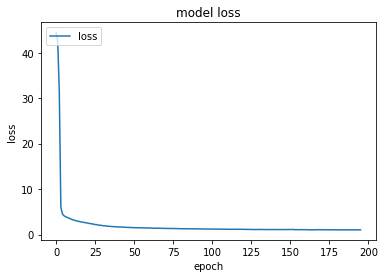

In [65]:
#Plot the history of the evolution of the loss 
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

In [66]:
y_pred = model.predict(X_test)
metrics.mean_squared_error(y_test, y_pred)

1.2678097280535396

In [67]:
X_new = new_houses.values
X_new = s.fit_transform(X_new.astype(np.float))

In [68]:
#Generate csv file
p = model.predict(X_new)
p = pd.DataFrame(p)
p = p.squeeze()
p = pd.DataFrame({'ID':new_houses.index, 'Price':p})
p.to_csv("neural_network_pred.csv", index=False)